# Using minimum inhibitory concentration (MIC) data to predict problem bacterial contaminants

## 1. Read in the packages I will need (pandas and seaborn)
## 2. Read in the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('MIC_data.csv')

## 3. Visualising the data
Below we can see that the table shows the species and strain number as well as minimum inhibitory concentration (MIC) for that species across a range of preservatives (these are measured in w/v or v/v depending on the agent).  The contaminant column gives a 1 for species that are common industrial contaminants and 0 if they are not.

In [2]:
df

,Species,Contaminant,Strain #,MIT,CMIT,BIT,BC,DMH,PH,MP,SB
0,B. ambifaria,0,207,0.00194,0.000150,0.002,0.1500,0.0135,0.250,0.10,0.4
1,B. ambifaria,0,267,0.00194,0.000037,0.001,0.0050,0.0135,0.125,0.05,0.2
2,B. ambifaria,0,338,0.00097,0.000075,0.001,0.1500,0.0135,0.250,0.10,0.2
3,B. ambifaria,0,1599,0.00097,0.000075,0.002,0.1500,0.0135,0.250,0.10,0.2
4,B. anthina,0,635,0.00194,0.000075,0.002,0.1500,0.0135,0.250,0.10,0.4
...,...,...,...,...,...,...,...,...,...,...,...
62,B. vietnamiensis,0,27,0.00097,0.000150,0.004,0.0100,0.0270,0.150,0.10,0.4
63,B. vietnamiensis,0,28,0.00097,0.000150,0.002,0.0100,0.0135,0.150,0.10,0.8
64,B. vietnamiensis,0,30,0.00194,0.000150,0.002,0.0075,0.0135,0.250,0.10,0.4
65,B. vietnamiensis,0,1304,0.00097,0.000037,0.002,0.1500,0.0135,0.125,0.05,0.1


## 4. Visualising relationship between species and MIC of sodium benzoate (SB)
The catplot function in seaborn visualises the relationship between species and the MIC of sodium benzoate (SB)

C:\Users\c1716861\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'B. ambifaria'),
  Text(1, 0, 'B. anthina'),
  Text(2, 0, 'B. arboris'),
  Text(3, 0, 'B. cenocepacia'),
  Text(4, 0, 'B. cepacia'),
  Text(5, 0, 'B. contaminans'),
  Text(6, 0, 'B. diffusa'),
  Text(7, 0, 'B. dolosa'),
  Text(8, 0, 'B. lata '),
  Text(9, 0, 'B. metallica'),
  Text(10, 0, 'B. multivorans'),
  Text(11, 0, 'B. pyrrocinia'),
  Text(12, 0, 'B. stabilis'),
  Text(13, 0, 'B. ubonensis'),
  Text(14, 0, 'B. vietnamiensis')])

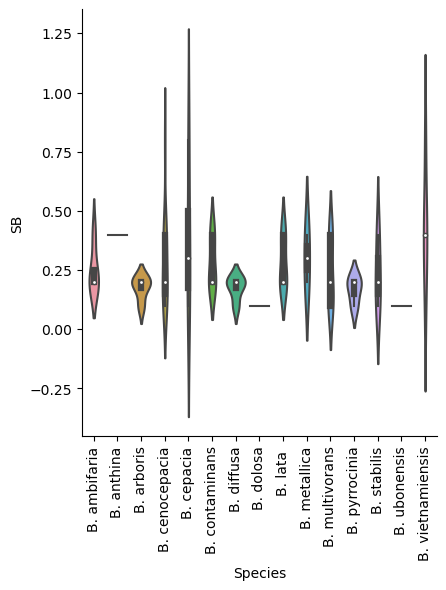

In [8]:
sns.catplot(
    data=df,
    x = "Species",
    y = "SB",
    kind="violin")
plt.xticks(rotation=90)

## 5. How do primary contaminants (*Burkholderia contaminans* and *Burkholderia lata*) differ in MIC of SB compared to other species?

Visualise relationship between problem contaminants and other species in MIC of SB

C:\Users\c1716861\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


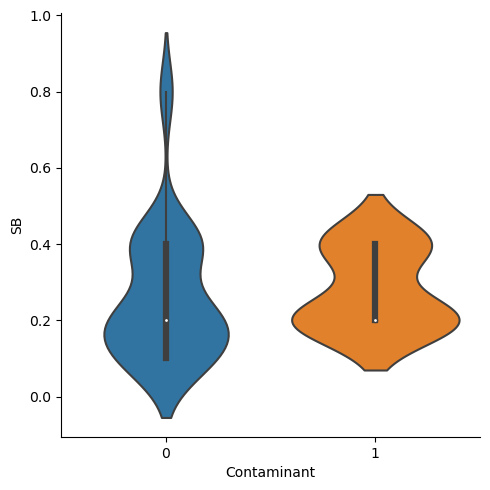

In [3]:
sns.catplot(
    data=df,
    x = "Contaminant",
    y = "SB",
    kind="violin",
)

## 6. Using logisitic regression to predict if a bacteria is a priority contaminant based on the MIC of SB alone

Import logistic regression, setting the X and Y values to make the classifier (called clf).  Check the score of this - how much of the variation in the data is explained by the model?

In [5]:
from sklearn.linear_model import LogisticRegression

X = df[["SB"]]
y = df["Contaminant"]

clf = LogisticRegression(random_state=0).fit(X, y)

In [6]:
clf

LogisticRegression(random_state=0)

In [7]:
clf.score(X, y)

0.8507462686567164

C:\Users\c1716861\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='SB', ylabel='Contaminant'>

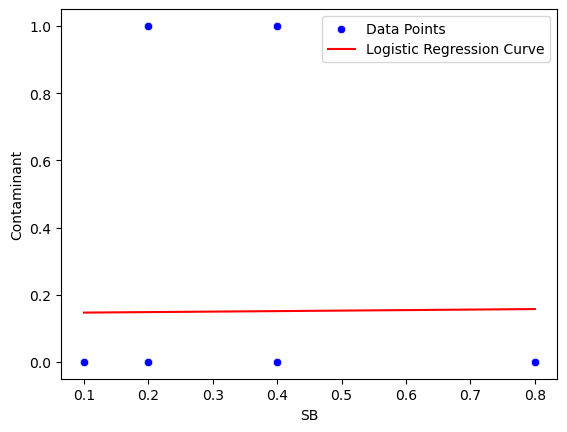

In [36]:
import numpy as np
# Scatter plot with logistic regression curve
sns.scatterplot(x="SB", y="Contaminant", data=df, color='blue', label='Data Points')
log_x = np.linspace(X["SB"].min(), X["SB"].max(), 100)
log_y = clf.predict_proba(log_x.reshape(-1, 1))[:, 1]
sns.lineplot(x=log_x, y=log_y, color='red', label='Logistic Regression Curve')

## 7. Perform a train/test split
Check the model score of this now it has been trained and tested with the input data, a score of greater than 0.5 indicates that the model is performing fairly.

In [8]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y)

#Set up logistic

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept = True)
train_X = X.values
train_y = y.values
model.fit(train_X,train_y)

#Validate model

model.score(test_X, test_y)

C:\Users\c1716861\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9411764705882353

## 8. Predict if a contaminant is a priority or not using its tolerance against SB.  

In this case I am predicting if a contaminant with the MIC of 0.2 is a priority contaminant (e.g: B. lata or B. contaminans).

In [58]:
#Predictions
Pred_conc =['0.2']

X_pred = pd.DataFrame(Pred_conc)

Prediction = clf.predict_proba(X_pred)
print(Prediction)
print(clf.predict(X_pred))

[[0.85173144 0.14826856]]
[0]


C:\Users\c1716861\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\c1716861\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Conclusion: This individual is not a priority contaminant